In [97]:
import torch
import torch.nn as nn

In [98]:
from tqdm import tqdm

In [99]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [100]:
from random import randint

In [101]:
import matplotlib.pyplot as plt

In [236]:
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset_train = FashionMNIST(root="../datasets/", train=True, download=False)
dataset_test = FashionMNIST(root="../datasets/", train=False, download=False)

In [237]:
import torch.nn.functional as F

In [259]:
X_train = dataset_train.data.type(torch.float)
Y_train = dataset_train.targets

X_test = dataset_test.data.type(torch.float)
Y_test = dataset_test.targets

X_train = F.interpolate(X_train.unsqueeze(dim=1), size=(224,224))
X_test = F.interpolate(X_test.unsqueeze(dim=1), size=(224,224))

X_train.shape
X_test.shape

torch.Size([10000, 1, 224, 224])

In [287]:
Y_train.min(), Y_train.max()

(tensor(0), tensor(9))

torch.Size([1, 224, 224])
tensor(9)


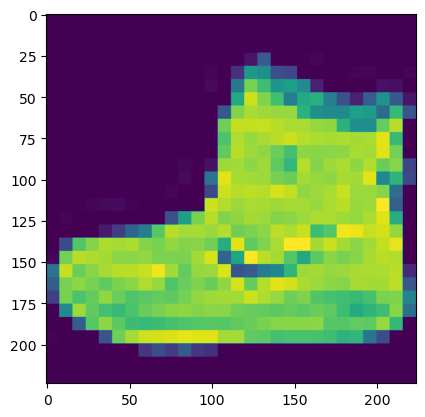

In [260]:
sx, sy = X_train[0], Y_train[0]
print(sx.shape)
print(sy)
plt.imshow(sx.squeeze())

In [291]:
class alexnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(11, 11), stride=(4, 4)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.Conv2d(in_channels=16, out_channels=24, kernel_size=(5,5), padding=(2,2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.Conv2d(in_channels=24, out_channels=32, kernel_size=(3,3), padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=24, kernel_size=(3,3), padding=(1,1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)), 
            nn.Flatten(),
            nn.Linear(in_features=24*5*5, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [292]:
x = torch.concat([torch.randn(224,224)]).reshape(1, 1, 224, 224)
x.shape
model = alexnet()
model(x).shape

torch.Size([1, 10])

In [293]:
model = alexnet()
def acc_fn(pred, target):
    return (pred.argmax(dim=1)==target).sum()

In [296]:
BS = 32

N_EPOCHS = 5

B_EPOCHS = int(60_000 / BS)

optim = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.1)

loss_fn = nn.NLLLoss()

losses = []
accs = []

for _ in tqdm(range(N_EPOCHS)):
    for b in tqdm(range(B_EPOCHS)):
        i = randint(0, 60_000-BS)
        pred = model(X_train[i:i+BS])
        targets = Y_train[i:i+BS]
        acc = acc_fn(pred, targets).item()/BS
        loss = loss_fn(pred, targets)
        losses.append(loss.item()/BS)
        loss.backward()
        optim.zero_grad()
        optim.step()
        if b % 50 == 0: 
            print("batch:", b, "acc:", acc)
            print("loss:", loss.item()/BS)

  0%|          | 0/5 [00:00<?, ?it/s]

batch: 0 acc: 0.0625
loss: 0.07344000041484833


batch: 50 acc: 0.09375
loss: 0.07533110678195953


batch: 100 acc: 0.09375
loss: 0.070052869617939


  0%|          | 0/5 [00:33<?, ?it/s]


KeyboardInterrupt: 

In [224]:
batch = torch.tensor([dataset_train[i][0].numpy() for i in range(i, i+BS)]).shape